# Mean-Shifting in Kernel Density Estimation for mode-seeking.

## 1. Annealed Mean-Shift

In plain Kernel Density Estimation (*KDE*), given a set of sampled points $\left\lbrace x_i\right\rbrace_{i=1}^n\subseteq\mathbb{R}^d$ one tries to build a distribution that could resemble the generator of the sample via a normalized (here, averaged) sum of *little* basis functions. Those are called the kernel functions, from which one of the most used would be the ***gaussian kernel***, for efficiency purposes.

The estimation of the generating probability density function (*pdf*) is given by

$$\hat{f}_K\left(x\right)\ =\ \frac{1}{n}\sum_{i=1}^nK_H\left(x-x_i\right)$$

where

$$K_H\ =\ |H|^{-\frac{1}{2}}K\left(H^{-\frac{1}{2}}x\right)$$

In some applications it is interesting to determine the value of the step matrix $H$, since it provides an optimal way of converging to a distribution minimizing *asymptotic mean integrated squared error* (AMISE) with respect to the real distribution. However, this approach would lead us to know the whole distribution, distracting us from the real purpose of this work. Plus, its complexity is critically dependant on de dimensionality of the problem we are dealing with. For that reason, we focus on tackling the issue of finding the mode of the estimated distribution, via a gradient-ascent-like reasoning.

First, for simplicity we can give a convenient shape to $H=h^2I_d$, so that the kernels used are isotropic (i. e., has radial symmetry). Secondly, we adopt another notation for the kernel, for reasons that will soon become apparent:

**Definition 1.** Let $K:\ \Omega\subseteq\mathbb{R}^d\longrightarrow\mathbb{R}$ and $k:\ [0,\infty)\longrightarrow\mathbb{R}$ be functions such that the following hold:

- $$K(x)=k(\|x\|^2)$$
- $k$ is nonnegative
- $k$ is nonincreasing
- $k$ is piecewise continuous and is integrable

where $\|\cdot\|$ stands for the Euclidean norm. Then $K$ is called a kernel, and $k$ is called its profile.

For all that concerns this work, the gaussian kernel can be thus represented by its profile function, $k(x)=e^{-x}$. All together, leads to the expression

$$\hat{f}_k\left(x\right)\ =\ \frac{c_k}{nh^d}\sum_{i=1}^nk\left(\left\|\frac{x-x_i}{h}\right\|^2\right)$$

where $c_k$ is a normalization constant. Since the ensemble of smooth functions conforms a smooth function, seeking for modes is equivalent to finding the estimate's greatest critical value. By deriving $\hat{f}_k$ explicitly, we get the following results:

$$
\begin{matrix}
\nabla\hat{f}_k(x) & = & \frac{c_k}{nh^d}\displaystyle\sum_{i=1}^n\nabla\left[k\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\right] \\
 & = &  \frac{c_k}{nh^d}\displaystyle\sum_{i=1}^nk'\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\nabla\left[\left\|\frac{x-x_i}{h}\right\|^2\right]\\
 & = &  \frac{c_k}{nh^d}\displaystyle\sum_{i=1}^nk'\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\frac{2}{h^2}(x-x_i)\\
 & = &  \frac{2}{h^2}\frac{c_k}{nh^d}\displaystyle\left[x\sum_{i=1}^nk'\left(\left\|\frac{x-x_i}{h}\right\|^2\right)-\sum_{i=1}^nx_ik'\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\right]\\
 & = & \frac{2}{h^2}\frac{c_k}{nh^d}\displaystyle\left[\sum_{i=1}^nx_ig\left(\left\|\frac{x-x_i}{h}\right\|^2\right)-x\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\right]\\
 & = & \frac{2}{h^2}\frac{c_k}{nh^d}\displaystyle\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\left[\frac{\sum_{i=1}^nx_ig\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}{\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}-x\right]\\
 & = & \frac{2c_k}{h^2c_g}\hat{f}_g(x)\cdot m_g(x)\\
 & = & 0
\end{matrix} 
$$

with $g(t)=-k'(t)$ and

$$
\begin{matrix}
 \hat{f}_g(x) & = & \frac{c_g}{nh^d}\displaystyle\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\\
 m_g(x) & = & \frac{\sum_{i=1}^nx_ig\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}{\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}-x
\end{matrix} 
$$

where $c_g$ is again a normalization constant. In literature, $g$ is again named as a *profile* function of some (a priori unkonwn) kernel, while $k$ is called its *shadow*. The name of the method comes from the expression $m_g(x)$, which is a measure of the centroid (otherwise known simply as average or mean value) of the samples, displaced by the value $x$. Hence, ***Mean-Shift*** (MS).

It is somewhat evident that this condition imposes that $m_g(x)=0$ when evaluated at the mode. Since approximating this value will be the target, a notion similar to a gradient-ascent method is used in this algorithm, by selecting values $x$ and redefining it as

$$x\ \longleftarrow\ \frac{\sum_{i=1}^nx_ig\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}{\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}$$

The method presented here pretends to enhance the performance of the above procedure, by choosing the parameter $h$ as a sequence of strictly decreasing values until reaching a last value, which in principle is the halting spot. That means choosing finite values $h_0>h_1>\ldots>h_M$ such that $h_0>>h_M$ and the procedure described has some kind of convergence.

As mentioned, the kernel we use is the gaussian, which has the negative exponential as its profile. Then it is straightforward the fact that profile and shadow functions are the same ($g(x)=-k'(x)=k(x)$). In fact, the gaussian kernel and its truncated version are the only ones satisfying this condition, and allows for even more simplification. From the definition of the kernel and the profile, and the fact that $|H|=h^{2d}$, we have that

$$
\begin{matrix}
 & K(x) & = & k(\|x\|) & = & e^{-\|x\|}\\
\Longrightarrow & |H|^{-\frac{1}{2}}K\left(H^{-\frac{1}{2}}x\right) & = & \frac{1}{h^d}k\left(\left\|\frac{x}{h}\right\|^2\right) & = & \frac{1}{h^d}e^{-\frac{\|x\|^2}{h^2}}\\
\Longrightarrow & \hat{f}_k(x) & = & \hat{f}_g(x) & = & \frac{c_{k|g}}{nh^d}\displaystyle\sum_{i=1} e^{-\frac{\|x-x_i\|^2}{h^2}}\\
\Longrightarrow & c_k & = & c_g & = & \frac{1}{\sqrt{\pi}^d} 
\end{matrix} 
$$


## 2. Fast Mean-Shift

Since the later method is highly dependent on the choice of the steps $h$, yet simple, it is not really clear how to make that choice. One could explore different sets of sequences until obtaining stable results, always being aware of the trade-off between speed of convergence and the amount of steps to consider (i. e., the smaller the step, the faster and less precise the final value will be; the larger the step, with more precision the mode is achieved with more steps).

This second approach uses the same results as before, but tries to enhance the performance of the method, while not explicitly choosing the steps value but by providing an implicit schema, iterating over the $x$ reevaluation until a tolerance is achieved.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time


In [279]:
def simpnorm(x, mu, sig):
    ex = - (((x - mu) / sig) ** 2) / 2
    norm = (1 / np.sqrt(2 * np.pi)) / sig
    distr = norm * np.exp(ex)
    return distr

def multnorm(xv, yv, mu, cov):
    distr = np.zeros(xv.shape)
    for i, x in enumerate(xv):
        for j, y in enumerate(yv):
            X = np.array([xv[i][j], yv[i][j]])
            covinv = np.linalg.inv(cov)
            ex = -(np.dot(X - mu, np.dot(covinv, X - mu))) / 2
            den = np.sqrt(np.abs(np.linalg.det(covinv))) / (2 * np.pi)
            distr[i][j] = den * np.exp(ex)
    return distr


In [168]:
def shadow(x):
    e = np.exp(-x)
    return e

def profile(x):
    e = np.exp(-x)
    return e

def pdfest(x, xsam, h):
    if len(xsam.shape) == 1:
        n = xsam.shape[0]
        d = 1
        cg = 1 / (np.sqrt(np.pi)) ** d
        norm = cg / (n * (h ** d))
        arg = (np.abs(x - xsam) / h) ** 2
        est = np.sum(profile(arg))
        
    else:
        n, d = xsam.shape
        cg = 1 / (np.sqrt(np.pi)) ** d
        norm = cg / (n * (h ** d))
        arg = (np.linalg.norm(x - xsam, axis=1) / h) ** 2
        est = np.sum(profile(arg))
    
    return norm * est

def mshift(x, xsam, h):
    if len(xsam.shape) == 1:
        n = xsam.shape[0]
        d = 1
        cg = 1 / (np.sqrt(np.pi)) ** d
        norm = cg / (n * h ** d)
        arg = (np.abs(x - xsam) / h) ** 2
        prof = profile(arg)
        sum1 = np.sum(xsam.T * prof)
        sum2 = np.sum(prof)
        shift = (sum1 / sum2) - x
        
    else:
        n, d = xsam.shape
        cg = 1 / (np.sqrt(np.pi)) ** d
        norm = cg / (n * h ** d)
        arg = (np.linalg.norm(x - xsam, axis=1) / h) ** 2
        prof = profile(arg)
        sum1 = np.sum(xsam.T * prof, axis=1)
        sum2 = np.sum(prof)
        shift = (sum1 / sum2) - x
    
    return shift, norm * sum2

def seqmshift(x0, xsam, hm):
    xs = [x0]
    xnew = x0
    for i in range(len(hm)):
        xnew, pdfestnew = mshift(xnew, xsam, hm[i])
        xs.append(xnew)
    xs = np.asarray(xs)
    return xnew, pdfestnew, xs
    

## 1. 1-D examples

### 1.1 Samples drawn from a simple normal distribution

In [ ]:
mu1 = 0.5
sigma1 = 0.8
size1 = 10000

xsam1 = np.random.normal(0.5, 0.8, size1)

In [ ]:
m1 = np.linspace(0, 2, 100)
hm1 = 6 + np.exp(-m1)

plt.plot(m1, hm1, 'r.')
plt.show()

In [ ]:
x0 = 3

ts = time.time()
xf1, pf1, xs1 = seqmshift(x0, xsam1, hm1)
tf = time.time()

comptime = np.round(tf - ts, 3)
print('Computation time: ' + str(comptime) + 's')

In [ ]:
x = np.linspace(-4, 4, 1000)
y1 = simpnorm(x)
y2 = simpnorm(xs1)

fig, ax = plt.subplots(1, 2, figsize=(13,6))

ax[0].plot(xx, yy, 'b.', ms=0.5)
ax[0].plot(xsam1, -0.05 - 0.1 * np.random.random(xsam1.shape[0]), '+k')

ax[1].plot(x, y1, 'b.', ms=0.5)
ax[1].plot(xs1, y2, 'r-', ms=0.5)
ax[1].plot(xs1, y2, 'ro')
ax[1].plot(xs1[-1], y2[-1], 'k*', ms=10)

plt.show()

## 2-D examples

In [101]:
np.random.seed(1)

mu = np.asarray([0., 1.])
cov = np.asarray([[1, 0.4], [0.4, 0.25]])
size = 10000

In [102]:
Nx = 85
Ny = 85

x = np.linspace(-4, 4 ,Nx)
y = np.linspace(-4, 5, Ny)
xv, yv = np.meshgrid(x, y)

xsam = np.random.multivariate_normal(mu, cov, size)
ev = multnorm(xv, yv, mu, cov)


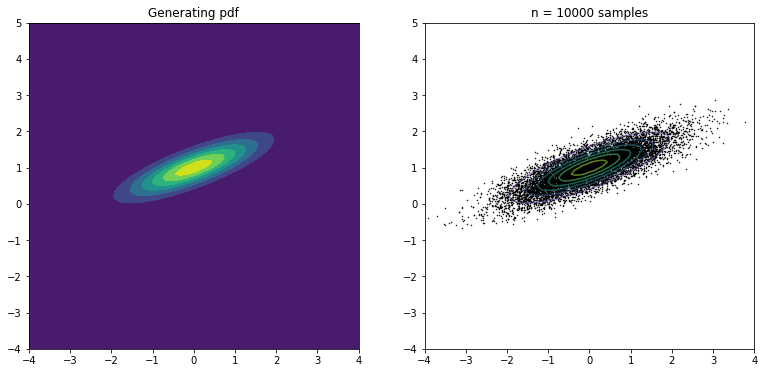

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(13,6))

ax[0].contourf(x, y, ev, cmap='viridis')
ax[0].set_title('Generating pdf')

ax[1].plot(xsam.T[0], xsam.T[1], 'k.', ms=1, zorder=1)
ax[1].contour(x, y, ev, alpha=0.6, cmap='viridis', zorder=2)
ax[1].set_xlim([x[0], x[-1]])
ax[1].set_ylim([y[0], y[-1]])
ax[1].set_title('n = ' + str(size) + ' samples')

plt.show()


In [85]:
m2 = np.linspace(1,200,151)
hm2 = 6 * m2 / m2

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.])

In [86]:
x0 = np.array([-1, -1])

ts = time.time()
xf2, pf2, xs2 = seqmshift(x0, xsam, hm2)
print(time.time() - ts)

60.77134442329407


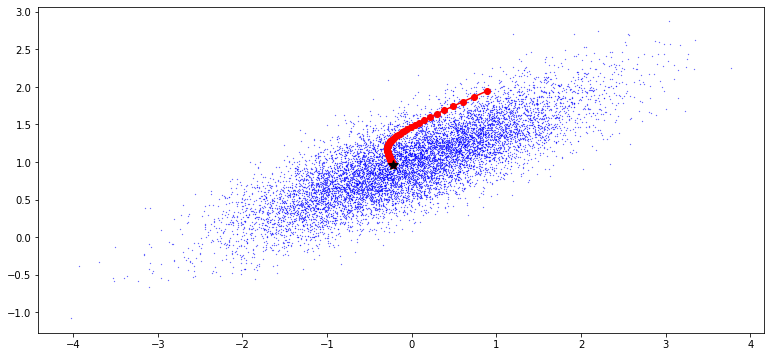

In [87]:
fig = plt.figure(figsize=(13,6))

plt.plot(xsam.T[0], xsam.T[1], 'b.', ms=0.5, zorder=1)
plt.plot(xs2.T[0][1::2], xs2.T[1][1::2], 'r-', ms=0.5, zorder=2)
plt.plot(xs2.T[0][1::2], xs2.T[1][1::2], 'ro', zorder=3)
plt.plot(xs2[-1][0], xs2[-1][1], 'k*', ms=10, zorder=4)

plt.show()

In [98]:
xf2, pf2

(array([-0.22119126,  0.9648624 ]), 0.004157752808496954)

In [75]:
xs.T[0][::2].shape

(76,)